# ThinkBayes Practice

Going through the exercises from the book [ThinkBayes](https://greenteapress.com/wp/think-bayes/).

Unfortunately, the book and code examples are written for Python 2, so that's what this Notebook is as well.

#### Link Dump
* [math in markdown](http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/)
* [seaborn distributions](http://seaborn.pydata.org/tutorial/distributions.html)

## Instructions for getting a Python 2 Jupyter Notebook
```
conda create -n py2 python=2 anaconda
conda activate py2
ipython kernel install
```

In [3]:
import sys
sys.path.append('../ThinkBayes/code/')

In [34]:
from __future__ import print_function

### Notes

**Bayes Theorem**

p(A and B) = p(B and A)

p(A and B) = p(A) $\times$ p(B|A)

p(B and A) = P(B) $\times$ p(A|B)

p(B) $\times$ p(A|B) = p(A) $\times$ p(B|A)

p(A|B) = $\frac{p(A)p(B|A)}{p(B)}$

**Diachronic Interpretation**

H = Hypothesis (prior)

D = Data

p(H|D) = $\frac{p(H)p(D|H)}{p(D)}$        

p(D|H) - likelihood

p(H|D) - posterior


# Chapter 4
## The beta distribution

Why Beta?

**conjugate prior** - if the prior distribution is a beta distribution, the posterior is also a beta distribution. This is useful for making updates with new data.

Beta depends on $\alpha$ and $\beta$ params - an update to the distribution is two simple additions ($\alpha$+h and $\beta$+t) in the case of `heads` and `tails`.

$\alpha$=1 and $\beta$=1 is a uniform distribution from 0 $\to$ 1

In [66]:
import seaborn as sns
import numpy as np
import matplotlib

In [17]:
values = [np.random.beta(1,1) for i in xrange(10000)]

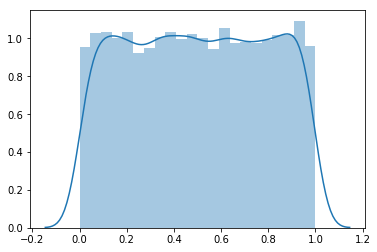

In [18]:
sns.distplot(values)

In [20]:
from thinkbayes import Beta

### Euro Problem

Flipped a Euro, saw 140 Heads and 110 Tails

In [58]:
beta = Beta()
beta.Update((140, 110))
print("Mean: ", beta.Mean())

Mean:  0.559523809524


In [77]:
ax = matplotlib.axes

(0, 1)

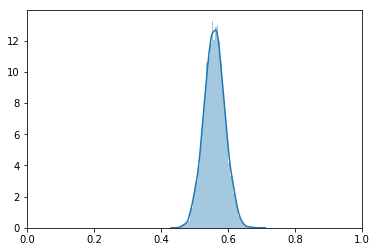

In [79]:
sns.distplot(beta.Sample(10000)).set_xlim(0,1)

# Chapter 5 - Odds and Addends

Odds:   10% = 9:1

In [97]:
import thinkbayes
import thinkplot

In [90]:
class Die(thinkbayes.Pmf):
    def __init__(self, sides):
        thinkbayes.Pmf.__init__(self)
        for x in xrange(1, sides+1):
            self.Set(x, 1)
        self.Normalize()

In [91]:
dice = [Die(6), Die(6), Die(6)]

In [102]:
samples = thinkbayes.SampleSum(dice, 10000)

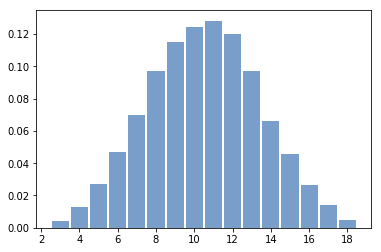

In [103]:
thinkplot.Hist(samples)

{'xscale': 'linear', 'yscale': 'linear'}

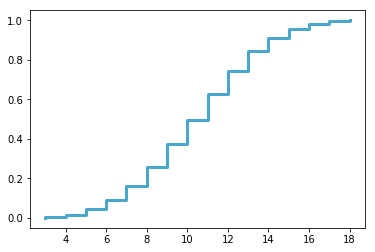

In [106]:
thinkplot.Cdf(samples.MakeCdf())

In [108]:
d6 = Die(6)
d8 = Die(8)

In [109]:
mix = thinkbayes.Pmf()
for die in [d6, d8]:
    for outcome, prob in die.Items():
        mix.Incr(outcome, prob)
mix.Normalize()

1.9999999999999996

In [111]:
pmf_dice = thinkbayes.Pmf()
pmf_dice.Set(Die(4), 5)
pmf_dice.Set(Die(8), 3)
pmf_dice.Normalize()

8

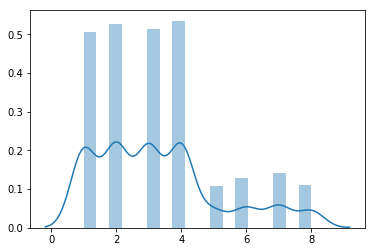

In [119]:
d_values = [pmf_dice.Random().Random() for x in xrange(1000)]
sns.distplot(d_values)

# Chapter 6 - Decision Analysis